# EDA

**CS109a**: Fall 2018

**Authors**: Gordon Hew, Wenqin Hu, Blair Leduc

**TF**: Ken Arnold

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import gzip
from sklearn import preprocessing

In [2]:
users_summary_df_gz_file = os.path.join('data',
                                        'users_final_agg_df.pkl.gz')
tweets_df_gz_file = os.path.join('tmp','tweets_final_df.pkl.gz')

BOTOMETER_SCORE_THRESHOLD = 0.43

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
pd.set_option('display.max_colwidth', -1)

users_summary_df=pd.read_pickle(users_summary_df_gz_file, 
                                compression = 'gzip')
bot_users_df=users_summary_df[users_summary_df['scores.universal'] \
                              >= BOTOMETER_SCORE_THRESHOLD]
non_bot_users_df=users_summary_df[users_summary_df['scores.universal'] \
                                  < BOTOMETER_SCORE_THRESHOLD]

users_summary_df[users_summary_df['scores.universal'].isnull()]

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities.description.urls,entities.url.urls,favourites_count,follow_request_sent,followers_count,...,mean_links_to_top_sports,mean_links_to_top_adult,retweet_ratio,mean_ref_to_person,mean_ref_to_norp,mean_ref_to_org,mean_ref_to_gpe,mean_ref_to_product,mean_ref_to_law,mean_ref_to_money
id,,,,,,,,,,,,,,,,,,,,,
758118622619283456,False,Wed Jul 27 01:55:39 +0000 2016,True,False,,[],NaN,34325,False,452,...,0.0,0.0,0.87,0.14,0.01,0.18,0.02,0.00,0.00,0.0
952701031313559553,False,Mon Jan 15 00:36:41 +0000 2018,True,False,it’s finally Christmas time so I can finally get my Santa clause in the mall job back 🙄🙄! 1922🐩,[],NaN,6954,False,824,...,0.0,0.0,0.60,0.09,0.00,0.13,0.01,0.00,0.00,0.0
77415430,False,Sat Sep 26 06:37:48 +0000 2009,False,False,"photographer, listener and above all retweeter",[],"[{'url': 'http://t.co/QhQVWNsvhA', 'expanded_url': 'http://www.youtube.com/watch?v=mMgKBnLBHtI', 'display_url': 'youtube.com/watch?v=mMgKBn…', 'indices': [0, 22]}]",1205,False,173,...,0.0,0.0,0.35,0.29,0.08,0.26,0.23,0.01,0.01,0.0


# Bot Summary

In [4]:
display(bot_users_df.describe())

,favourites_count,followers_count,friends_count,listed_count,statuses_count,scores.universal,tweets_per_hour_00,tweets_per_hour_01,tweets_per_hour_02,tweets_per_hour_03,...,mean_links_to_top_sports,mean_links_to_top_adult,retweet_ratio,mean_ref_to_person,mean_ref_to_norp,mean_ref_to_org,mean_ref_to_gpe,mean_ref_to_product,mean_ref_to_law,mean_ref_to_money
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,149.0,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,20526.154362,2981.677852,2751.664430,30.087248,41225.060403,0.649054,3.248322,3.328859,4.791946,6.744966,...,0.0,0.002148,0.538806,0.262986,0.033212,0.265707,0.157329,0.008725,0.001699,0.000604
std,60815.995895,11507.862517,9766.054523,113.505979,93982.373225,0.160747,4.953713,5.173272,7.063682,12.946957,...,0.0,0.013334,0.433766,0.316889,0.051511,0.256622,0.312632,0.014588,0.005532,0.002658
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.433677,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,25.000000,72.000000,0.000000,196.000000,0.515643,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.020000,0.071429,0.000000,0.110000,0.045977,0.000000,0.000000,0.000000
50%,649.000000,139.000000,307.000000,1.000000,2737.000000,0.596776,2.000000,1.000000,2.000000,2.000000,...,0.0,0.000000,0.670000,0.180000,0.010000,0.202381,0.090000,0.000000,0.000000,0.000000
75%,8222.000000,913.000000,1578.000000,8.000000,26708.000000,0.799058,5.000000,5.000000,6.000000,8.000000,...,0.0,0.000000,0.990000,0.344828,0.040000,0.350000,0.166667,0.010000,0.000000,0.000000
max,383288.000000,99666.000000,85123.000000,1045.000000,624250.000000,0.972640,36.000000,30.000000,35.000000,87.000000,...,0.0,0.130000,1.000000,3.000000,0.290000,2.080000,2.780000,0.070000,0.040000,0.020000


# Non Bot Summary

In [5]:
display(non_bot_users_df.describe())

,favourites_count,followers_count,friends_count,listed_count,statuses_count,scores.universal,tweets_per_hour_00,tweets_per_hour_01,tweets_per_hour_02,tweets_per_hour_03,...,mean_links_to_top_sports,mean_links_to_top_adult,retweet_ratio,mean_ref_to_person,mean_ref_to_norp,mean_ref_to_org,mean_ref_to_gpe,mean_ref_to_product,mean_ref_to_law,mean_ref_to_money
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,...,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,21497.786557,1676.258255,859.053066,24.320755,30009.096698,0.136253,4.830189,5.323113,5.996462,6.750000,...,0.000389,0.000047,0.553825,0.168645,0.029975,0.184305,0.088890,0.009025,0.001297,0.001117
std,34017.578878,6341.276733,1538.391359,88.341179,51654.958520,0.104591,5.835966,6.904943,7.323120,7.587117,...,0.006008,0.001374,0.313985,0.137062,0.044313,0.122844,0.089975,0.015482,0.004003,0.004096
min,0.000000,0.000000,0.000000,0.000000,30.000000,0.023519,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2513.750000,136.000000,193.000000,0.000000,3068.500000,0.052029,0.000000,0.750000,1.000000,1.000000,...,0.000000,0.000000,0.287500,0.080000,0.000000,0.100000,0.030000,0.000000,0.000000,0.000000
50%,9610.000000,383.000000,404.000000,3.000000,10648.000000,0.103286,4.000000,4.000000,4.000000,5.000000,...,0.000000,0.000000,0.590000,0.135417,0.020000,0.150000,0.060000,0.000000,0.000000,0.000000
75%,25160.000000,1127.000000,888.250000,12.000000,32436.250000,0.194668,7.000000,7.000000,8.000000,10.000000,...,0.000000,0.000000,0.840000,0.230000,0.040000,0.240000,0.110000,0.010000,0.000000,0.000000
max,356739.000000,100730.000000,23086.000000,1550.000000,533364.000000,0.413570,55.000000,49.000000,87.000000,68.000000,...,0.160000,0.040000,1.000000,1.600000,0.370000,0.780000,0.850000,0.160000,0.030000,0.047619


# User Level EDA

## Histogram of All Users and Bot Score

/Users/blair/.pyenv/versions/3.6.7/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/blair/.pyenv/versions/3.6.7/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/blair/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


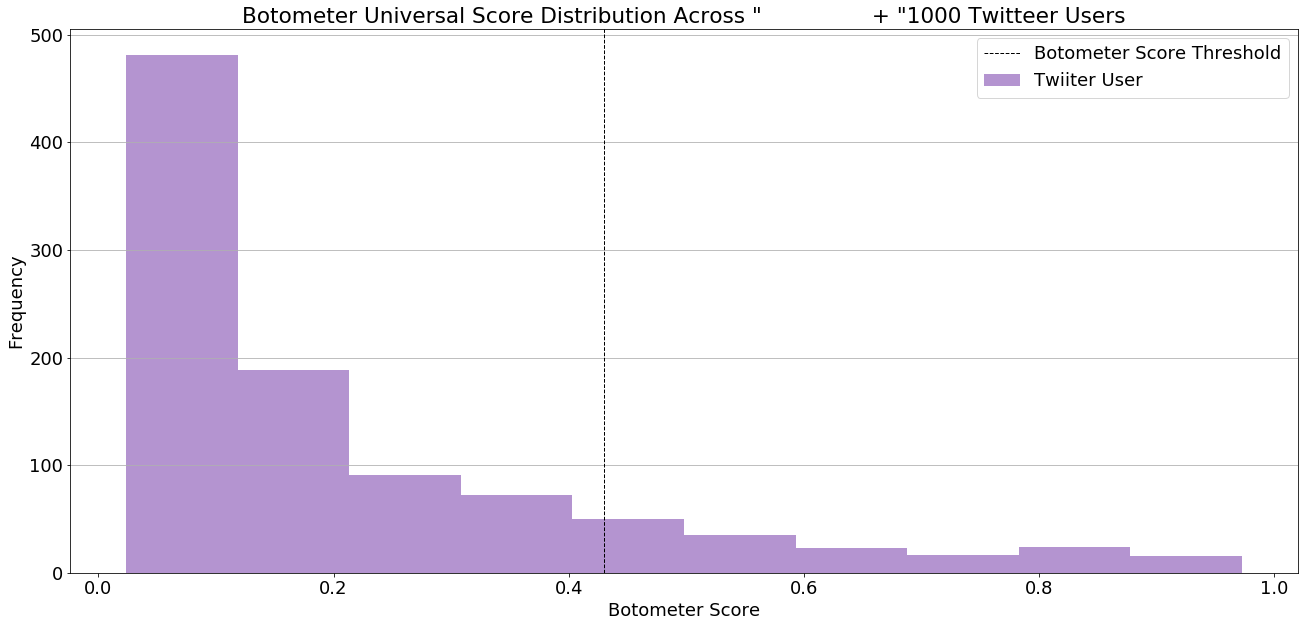

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22, 10))

axes.axvline(BOTOMETER_SCORE_THRESHOLD, color = 'k', 
             linestyle = 'dashed', 
             linewidth = 1, 
             label = 'Botometer Score Threshold')

axes.hist(users_summary_df['scores.universal'], label = 'Twiiter User', 
          alpha=0.7, color='C4')
axes.set_title('Botometer Universal Score Distribution Across " \
               + "1000 Twitteer Users')
axes.set_xlabel('Botometer Score')
axes.set_ylabel('Frequency')
axes.yaxis.grid()
axes.legend()

fig.savefig('fig/user_hist.png', format = 'png')
fig.savefig('../docs/assets/images/user_hist.png', format = 'png')

## Scaling data for box plots

In [30]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_columns = ['followers_count', 'friends_count', 'favourites_count', 
                'statuses_count', 'listed_count']
bot_scaled = min_max_scaler.fit_transform(bot_users_df[norm_columns])
bot_scaled_df = pd.DataFrame(bot_scaled, columns = norm_columns)

non_bot_scaled = min_max_scaler\
                    .fit_transform(non_bot_users_df[norm_columns])
non_bot_scaled_df = pd.DataFrame(non_bot_scaled, columns = norm_columns)

/Users/blair/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/blair/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


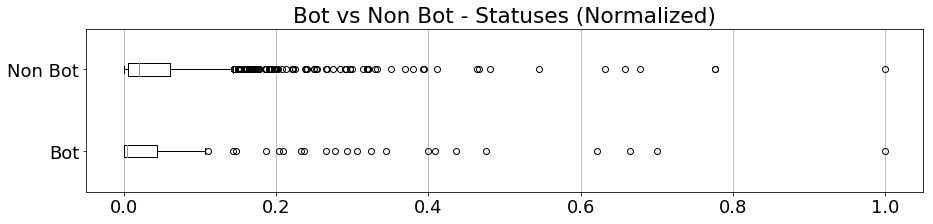

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
labels = ['Bot', 'Non Bot']

statuses_data = [bot_scaled_df['statuses_count'], 
                 non_bot_scaled_df['statuses_count']]

axes.boxplot(statuses_data, labels = labels, vert = False)
axes.set_title('Bot vs Non Bot - Statuses (Normalized)')
axes.xaxis.grid()
fig.savefig('fig/boxplot_statuses.png', format = 'png')
fig.savefig('../docs/assets/images/boxplot_statuses.png', 
            format = 'png')

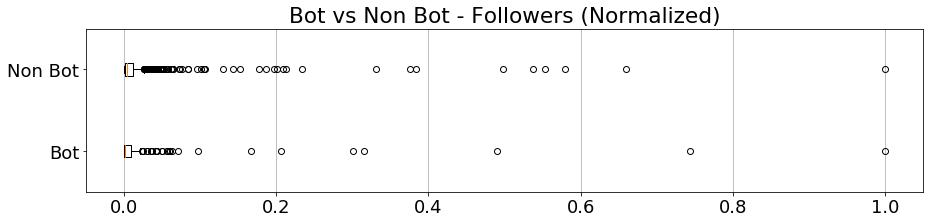

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))

followers_data = [bot_scaled_df['followers_count'], 
                  non_bot_scaled_df['followers_count']]
axes.boxplot(followers_data, labels = labels, vert = False)
axes.set_title('Bot vs Non Bot - Followers (Normalized)')
axes.xaxis.grid()
fig.savefig('fig/boxplot_followers.png', format = 'png')
fig.savefig('../docs/assets/images/boxplot_followers.png', 
            format = 'png')

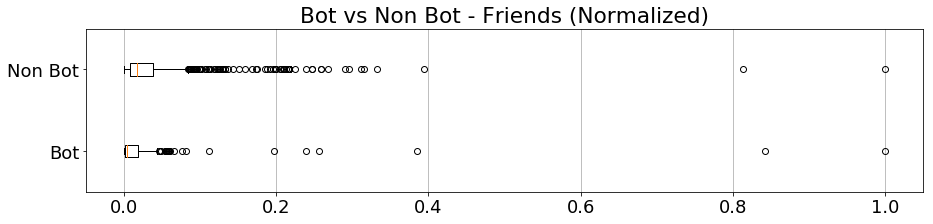

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
friends_data = [bot_scaled_df['friends_count'], 
                non_bot_scaled_df['friends_count']]

axes.boxplot(friends_data, labels = labels, vert = False)
axes.set_title('Bot vs Non Bot - Friends (Normalized)')
axes.xaxis.grid()
fig.savefig('fig/boxplot_friends.png', format = 'png')
fig.savefig('../docs/assets/images/boxplot_friends.png', 
            format = 'png')

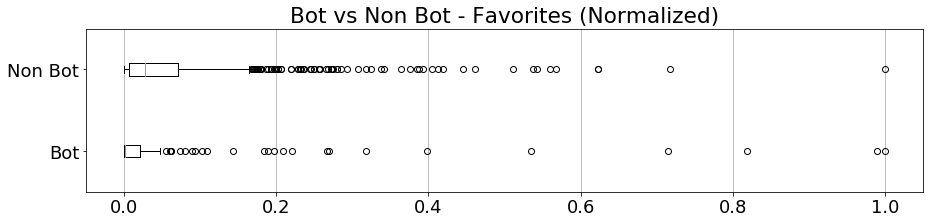

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
favorites_data = [bot_scaled_df['favourites_count'], 
                  non_bot_scaled_df['favourites_count']]

axes.boxplot(favorites_data, labels = labels, vert = False)
axes.set_title('Bot vs Non Bot - Favorites (Normalized)')
axes.xaxis.grid()
fig.savefig('fig/boxplot_favorites.png', format = 'png')
fig.savefig('../docs/assets/images/boxplot_favorites.png', 
            format = 'png')

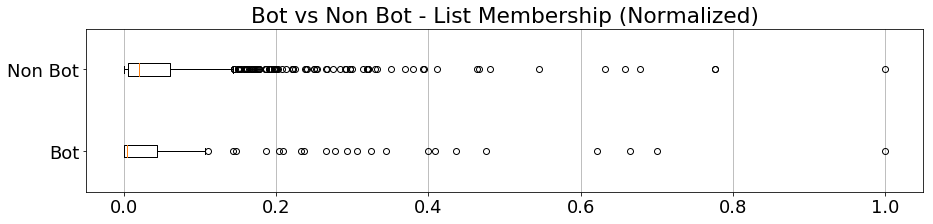

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
lists_data = [bot_scaled_df['listed_count'], 
              non_bot_scaled_df['listed_count']]

axes.boxplot(statuses_data, labels = labels, vert = False)
axes.set_title('Bot vs Non Bot - List Membership (Normalized)')
axes.xaxis.grid()
fig.savefig('fig/boxplot_listed.png', format = 'png')
fig.savefig('../docs/assets/images/boxplot_listed.png', 
            format = 'png')

## Natural Language Based Metrics

Named Entities:
- **PERSON**: People, including fictional.
- **NORP**: Nationalities or religious or political groups.
- **ORG**: Companies, agencies, institutions, etc.
- **GPE**: Countries, cities, states.
- **PRODUCT**: Objects, vehicles, foods, etc. (Not services.)
- **LAW**: Named documents made into laws.
- **MONEY**: Monetary values, including unit.

In [13]:
named_entities = ['PERSON', 'NORP', 'ORG', 'GPE', 
                  'PRODUCT', 'LAW', 'MONEY']

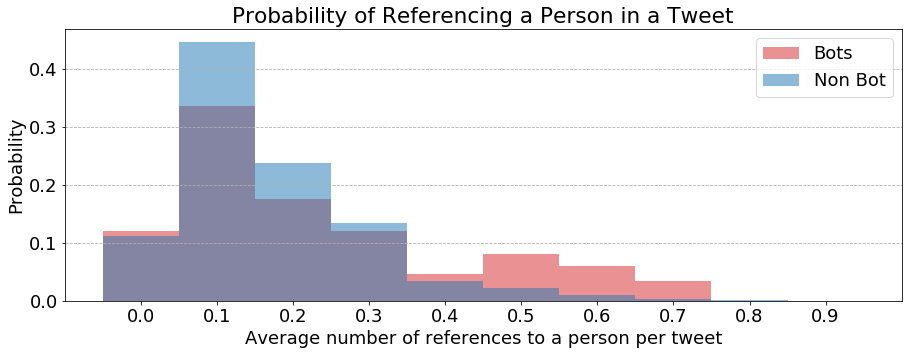

In [14]:
plt.figure(figsize=(15,5))
bins=np.arange(0,1.1,0.1)-0.05
data = bot_users_df['mean_ref_to_person']
plt.hist(data, alpha=0.5, color='C3', bins=bins, label='Bots', 
         weights=np.ones(len(data)) / len(data), density=False)
data = non_bot_users_df['mean_ref_to_person']
plt.hist(data, alpha=0.5, bins=bins, label='Non Bot', 
         weights=np.ones(len(data)) / len(data), density=False)
plt.title(f'Probability of Referencing a Person in a Tweet')
plt.xlabel('Average number of references to a person per tweet')
plt.ylabel('Probability')
plt.xticks(np.arange(0,1,0.1))
plt.xlim([-0.1,1])
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/nlp_person_tweets.png', format = 'png')
plt.savefig('../docs/assets/images/nlp_person_tweets.png', 
            format = 'png')
plt.show()

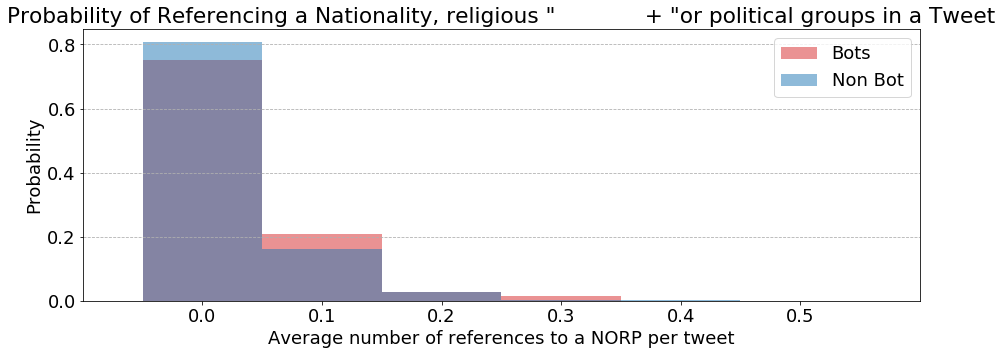

In [15]:
plt.figure(figsize=(15,5))
bins=np.arange(0,0.7,0.1)-0.05
data = bot_users_df['mean_ref_to_norp']
plt.hist(data, alpha=0.5, color='C3', bins=bins, label='Bots', 
         weights=np.ones(len(data)) / len(data), density=False)
data = non_bot_users_df['mean_ref_to_norp']
plt.hist(data, alpha=0.5, bins=bins, label='Non Bot', 
         weights=np.ones(len(data)) / len(data), density=False)
plt.title(f'Probability of Referencing a Nationality, religious " \
            + "or political groups in a Tweet')
plt.xlabel('Average number of references to a NORP per tweet')
plt.ylabel('Probability')
plt.xticks(np.arange(0,0.6,0.1))
plt.xlim([-0.1,0.6])
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/nlp_norp_tweets.png', format = 'png')
plt.savefig('../docs/assets/images/nlp_norp_tweets.png', 
            format = 'png')
plt.show()

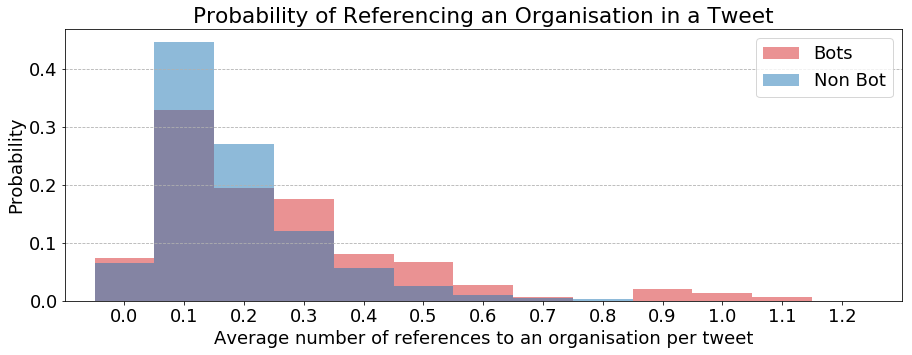

In [16]:
plt.figure(figsize=(15,5))
bins=np.arange(0,1.4,0.1)-0.05
data = bot_users_df['mean_ref_to_org']
plt.hist(data, alpha=0.5, color='C3', bins=bins, label='Bots', 
         weights=np.ones(len(data)) / len(data), density=False)
data = non_bot_users_df['mean_ref_to_org']
plt.hist(data, alpha=0.5, bins=bins, label='Non Bot', 
         weights=np.ones(len(data)) / len(data), density=False)
plt.title(f'Probability of Referencing an Organisation in a Tweet')
plt.xlabel('Average number of references to an organisation per tweet')
plt.ylabel('Probability')
plt.xticks(np.arange(0,1.3,0.1))
plt.xlim([-0.1,1.3])
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/nlp_org_tweets.png', format = 'png')
plt.savefig('../docs/assets/images/nlp_org_tweets.png', 
            format = 'png')
plt.show()

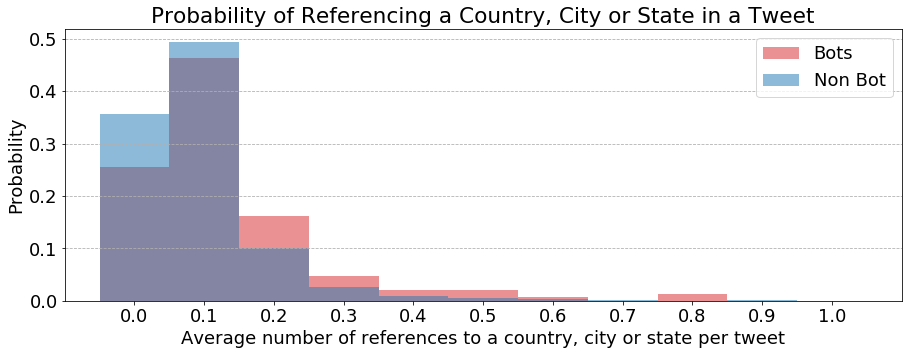

In [17]:
plt.figure(figsize=(15,5))
bins=np.arange(0,1.2,0.1)-0.05
data = bot_users_df['mean_ref_to_gpe']
plt.hist(data, alpha=0.5, color='C3', bins=bins, label='Bots', 
         weights=np.ones(len(data)) / len(data), density=False)
data = non_bot_users_df['mean_ref_to_gpe']
plt.hist(data, alpha=0.5, bins=bins, label='Non Bot', 
         weights=np.ones(len(data)) / len(data), density=False)
plt.title('Probability of Referencing a '\
          +f'Country, City or State in a Tweet')
plt.xlabel('Average number of references to a '\
           +'country, city or state per tweet')
plt.ylabel('Probability')
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim([-0.1,1.1])
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/nlp_gpe_tweets.png', format = 'png')
plt.savefig('../docs/assets/images/nlp_gpe_tweets.png', 
            format = 'png')
plt.show()

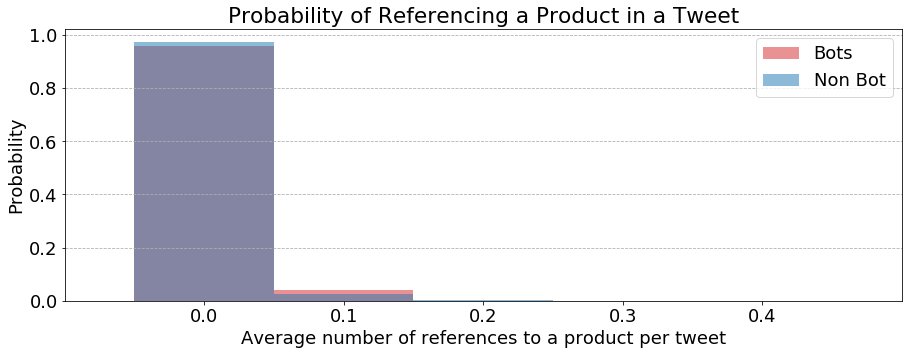

In [18]:
plt.figure(figsize=(15,5))
bins=np.arange(0,0.6,0.1)-0.05
data = bot_users_df['mean_ref_to_product']
plt.hist(data, alpha=0.5, color='C3', bins=bins, label='Bots', 
         weights=np.ones(len(data)) / len(data), density=False)
data = non_bot_users_df['mean_ref_to_product']
plt.hist(data, alpha=0.5, bins=bins, label='Non Bot', 
         weights=np.ones(len(data)) / len(data), density=False)
plt.title(f'Probability of Referencing a Product in a Tweet')
plt.xlabel('Average number of references to a product per tweet')
plt.ylabel('Probability')
plt.xticks(np.arange(0,0.5,0.1))
plt.xlim([-0.1,0.5])
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/nlp_product_tweets.png', format = 'png')
plt.savefig('../docs/assets/images/nlp_product_tweets.png', 
            format = 'png')
plt.show()

/Users/blair/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


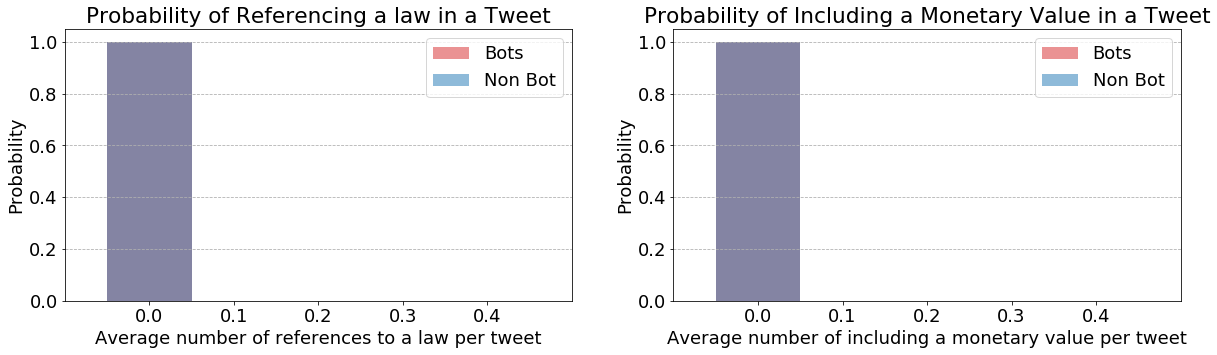

In [19]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
bins=np.arange(0,0.6,0.1)-0.05
data = bot_users_df['mean_ref_to_law']
ax[0].hist(data, alpha=0.5, color='C3', bins=bins, label='Bots', 
           weights=np.ones(len(data)) / len(data), density=False)
data = non_bot_users_df['mean_ref_to_law']
ax[0].hist(data, alpha=0.5, bins=bins, label='Non Bot', 
           weights=np.ones(len(data)) / len(data), density=False)
ax[0].set_title(f'Probability of Referencing a law in a Tweet')
ax[0].set_xlabel('Average number of references to a law per tweet')
ax[0].set_ylabel('Probability')
ax[0].set_xticks(np.arange(0,0.5,0.1))
ax[0].set_xlim([-0.1,0.5])
ax[0].grid(axis='y', linestyle='--')
ax[0].legend()
bins=np.arange(0,0.6,0.1)-0.05
data = bot_users_df['mean_ref_to_money']
ax[1].hist(data, alpha=0.5, color='C3', bins=bins, label='Bots', 
           weights=np.ones(len(data)) / len(data), density=False)
data = non_bot_users_df['mean_ref_to_money']
ax[1].hist(data, alpha=0.5, bins=bins, label='Non Bot', 
           weights=np.ones(len(data)) / len(data), density=False)
ax[1].set_title(f'Probability of Including a Monetary Value in a Tweet')
ax[1].set_xlabel('Average number of including a '\
                 +'monetary value per tweet')
ax[1].set_ylabel('Probability')
ax[1].set_xticks(np.arange(0,0.5,0.1))
ax[1].set_xlim([-0.1,0.5])
ax[1].grid(axis='y', linestyle='--')
ax[1].legend()
fig.savefig('fig/nlp_law_tweets.png', format = 'png')
fig.savefig('../docs/assets/images/nlp_law_and_money_tweets.png', 
            format = 'png')
fig.show()

## Tweets Per Hour (Bar Chart) - Blair

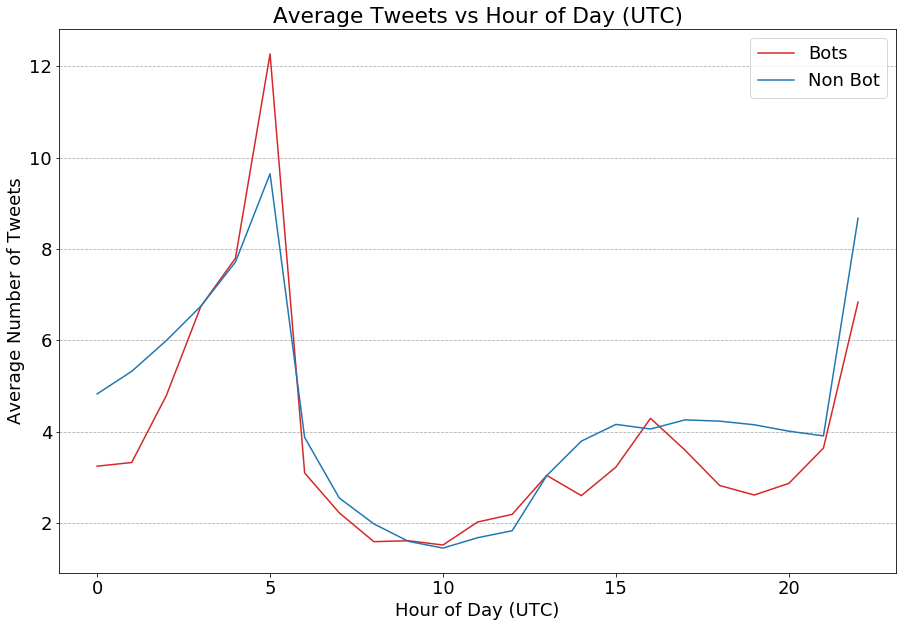

In [22]:
sum_bot = bot_users_df['tweets_per_hour'].apply(lambda x: 
                                                x[0]).mean()
sum_non_bot = non_bot_users_df['tweets_per_hour'].apply(lambda x: 
                                                        x[0]).mean()

plt.figure(figsize=(15,10))
plt.plot(range(0,23),sum_bot, label='Bots', color='C3')
plt.plot(range(0,23),sum_non_bot, label='Non Bot', color='C0')
plt.title('Average Tweets vs Hour of Day (UTC)')
plt.ylabel('Average Number of Tweets')
plt.xlabel('Hour of Day (UTC)')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('../docs/assets/images/tweets_per_hour.png', 
            format = 'png')
plt.show()

# Tweet Level EDA

In [23]:
pd.set_option('display.max_rows', 350)

tweets_df = pd.read_pickle(tweets_df_gz_file, compression = 'gzip')

bot_tweets_df = tweets_df[tweets_df['scores.universal']  >= 0.43]
human_tweets_df = tweets_df[tweets_df['scores.universal']  < 0.43]

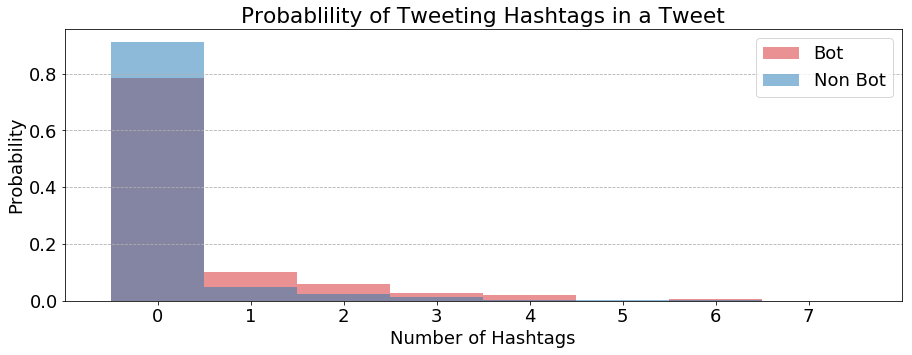

In [25]:
plt.figure(figsize=(15,5))
bins=np.arange(9)-0.5
plt.hist(bot_tweets_df['entities.hashtags'].apply(lambda x: len(x)), 
         alpha = 0.50, bins=bins, label = 'Bot', 
         color='C3', density=True)
plt.hist(human_tweets_df['entities.hashtags'].apply(lambda x: len(x)), 
         alpha = 0.50, bins=bins, label = 'Non Bot', 
         color='C0', density=True)
plt.title('Probablility of Tweeting Hashtags in a Tweet')
plt.xlabel('Number of Hashtags')
plt.ylabel('Probability')
plt.xticks(range(8))
plt.xlim([-1,8])
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/prop_hashtag_tweet.png', format = 'png')
plt.savefig('../docs/assets/images/prop_hashtag_tweet.png', 
            format = 'png')
plt.show()

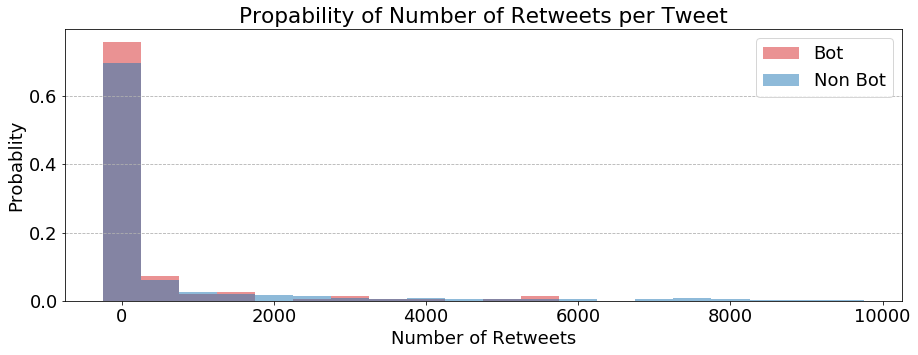

In [26]:
plt.figure(figsize=(15,5))
bins=np.arange(0,10500,500)-250
data=bot_tweets_df['retweet_count']
plt.hist(data, alpha = 0.50, bins=bins, label = 'Bot', color='C3', 
         weights=np.ones(len(data)) / len(data), density=False)
data=human_tweets_df['retweet_count']
plt.hist(data, alpha = 0.50, bins=bins, label = 'Non Bot', color='C0', 
         weights=np.ones(len(data)) / len(data), density=False)
plt.title('Propability of Number of Retweets per Tweet')
plt.xlabel('Number of Retweets')
plt.ylabel('Probablity')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/prop_retweets_tweet.png', format = 'png')
plt.savefig('../docs/assets/images/prop_retweets_tweet.png', 
            format = 'png')
plt.show()

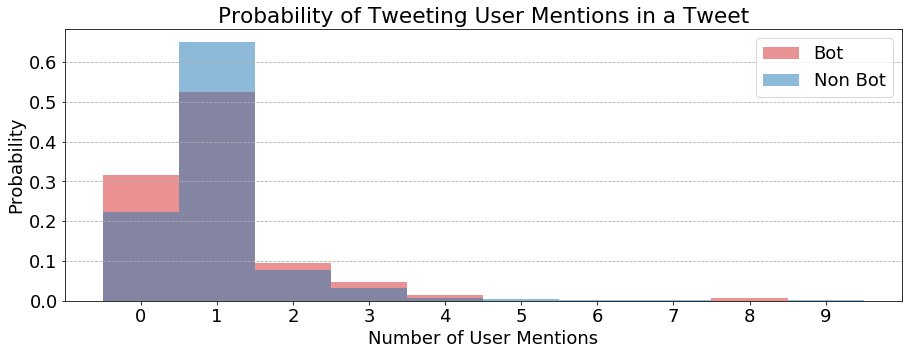

In [27]:
plt.figure(figsize=(15,5))
bins=np.arange(11)-0.5
plt.hist(bot_tweets_df['entities.user_mentions'].apply(lambda x: 
                                                       len(x)), 
         alpha = 0.50, bins=bins, label = 'Bot', 
         color='C3', density=True)
plt.hist(human_tweets_df['entities.user_mentions'].apply(lambda x: 
                                                         len(x)), 
         alpha = 0.50, bins=bins, label = 'Non Bot', 
         color='C0', density=True)
plt.title('Probability of Tweeting User Mentions in a Tweet')
plt.xlabel('Number of User Mentions')
plt.ylabel('Probability')
plt.xticks(range(10))
plt.xlim([-1,10])
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/prop_user_mentions_tweet.png', format = 'png')
plt.savefig('../docs/assets/images/prop_user_mentions_tweet.png', 
            format = 'png')
plt.show()

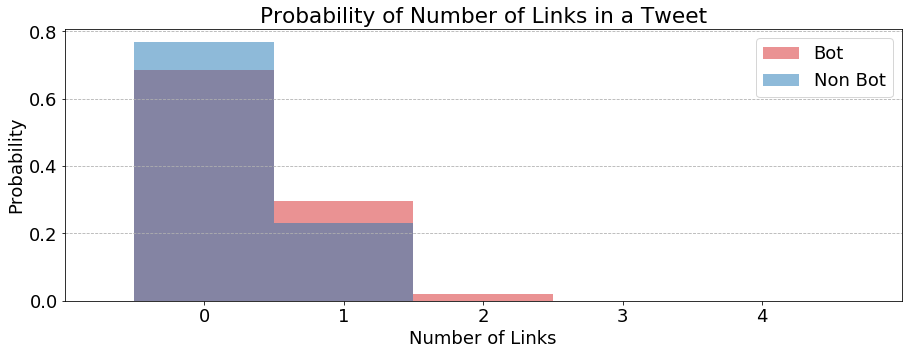

In [28]:
plt.figure(figsize=(15,5))
bins=np.arange(6)-0.5
plt.hist(bot_tweets_df['entities.urls'].apply(lambda x: len(x)), 
         alpha = 0.50, bins=bins, label = 'Bot', 
         color='C3', density=True)
plt.hist(human_tweets_df['entities.urls'].apply(lambda x: len(x)), 
         alpha = 0.50, bins=bins, label = 'Non Bot', 
         color='C0', density=True)
plt.title('Probability of Number of Links in a Tweet')
plt.xlabel('Number of Links')
plt.ylabel('Probability')
plt.xticks(range(5))
plt.xlim([-1,5])
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/prop_links_tweet.png', format = 'png')
plt.savefig('../docs/assets/images/prop_links_tweet.png', 
            format = 'png')
plt.show()

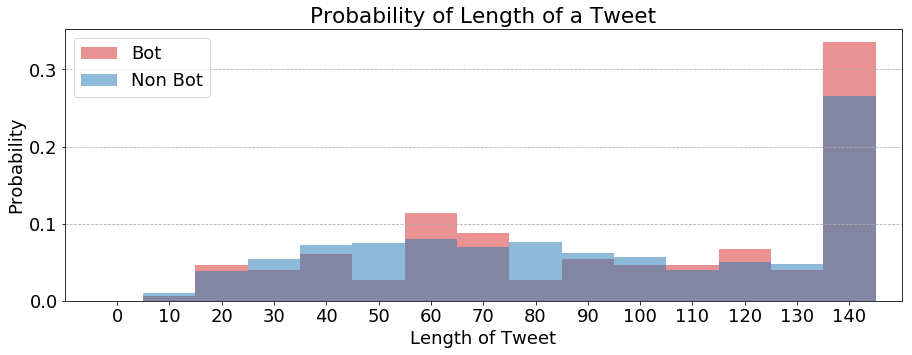

In [29]:
plt.figure(figsize=(15,5))
bins=np.arange(0,160, 10)-5
data=bot_tweets_df['text'].apply(lambda x: len(x))
plt.hist(data, alpha = 0.50, bins=bins, label = 'Bot', color='C3', 
         weights=np.ones(len(data)) / len(data), density=False)
data=human_tweets_df['text'].apply(lambda x: len(x))
plt.hist(data, alpha = 0.50, bins=bins, label = 'Non Bot', color='C0', 
         weights=np.ones(len(data)) / len(data), density=False)
plt.title('Probability of Length of a Tweet')
plt.xlabel('Length of Tweet')
plt.ylabel('Probability')
plt.xticks(range(0, 150, 10))
plt.xlim([-10,150])
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.savefig('fig/prop_length_tweet.png', format = 'png')
plt.savefig('../docs/assets/images/prop_length_tweet.png', 
            format = 'png')
plt.show()